Script to download the data (.csv format).
Creating file object nba to read the csv file. 
Import libraries pandas, requests, matplotlib

In [14]:
!pip install pandas

In [9]:

!pip install requests

In [12]:
!pip install matplotlib




In [8]:
import requests
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

response = requests.get(download_url)
#save the file nba_all_elo.csv in your current working directory
response.raise_for_status()#check that the request was successful

with open(target_csv_path, "wb") as f:
    f.write(response.content)

print("Download ready")

Download ready


In [9]:
import pandas as pd

nba = pd.read_csv(target_csv_path)



Exploring data.
Finding length, dimension, setting formatting options for the data, viewing data using head and tail. 

In [4]:
#len() determines the number of rows (observations) in a dataset
len(nba)
#.shape determines dimensionality
#the result is a tuple containing number of rows and columns
nba.shape
#take a look at the first five rows to see the actual data
nba.head()
#configure pandas to display all 23 columns
pd.set_option("display.max.columns", None)
#show only two decimal places
pd.set_option("display.precision", 2)
#display last five rows
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


QUES 1. Display the first 3 rows of your dataset.
For this we use the head function and pass argument 3 to select the first 3 rows only.

In [6]:
nba.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.0,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.0,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.0,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN


In [ ]:
Viewing structure of date and basic descriptive statistics for all numeric columns. 

In [9]:
nba.info()
nba.describe(include=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,194611010TRH,NBA,4/13/2011,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


QUES 2. Observation team_id and fran_id (franchise) columns

We can at this point that the column team_id has more unique values than column fran_id (almost double).


In [ ]:
QUES 3. Find out how many wins and losses the Minneapolis Lakers had and how many points they scored during the matches in the dataset.

We use the loc function to subset the data to chose only the game result where team_id is MNL. We use value_counts for counting total number of wins and losses.
We show same logic to subset data to show number of points they scored during the matches by just replacing game_result by pts.


In [13]:

nba.loc[nba["team_id"] == "MNL", "game_result"].value_counts()



W    524
L    422
Name: game_result, dtype: int64

In [14]:
nba.loc[nba["team_id"] == "MNL", "pts"].value_counts()

91     33
89     29
96     28
97     28
93     26
       ..
60      1
58      1
50      1
18      1
127     1
Name: pts, Length: 81, dtype: int64

In [ ]:
QUES 4. Find out how many points the Boston Celtics have scored during all matches contained in this dataset. 

We use .loc to subset nba and use .sum() function to display sum of all the points for team_id BOS.

In [16]:

nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

QUES 5. Explain your observations from QUES 2. in a structured way.

In ques 2 we observed that column team_id has more unique values than column fran_id. This makes sense because fran_id has 1:Many relationship with team_id, which means that for each unique label of fran_id there exist multiple unique team_ids. After exploring the dataset we can see that Wizards is the biggest franchise with 6 team_ids under it (BAL, CAP, CHP, CHZ, WAS, WSB) followed by Nets (BRK, NJA, NJN, NYA, NYN) and Kings (CIN, KCK, KCO, ROC, SAC) which each has 5 team_ids under it. From the dataset we also know that max matches have been played by frand_id Lakers (6024) and least by Jets, Ironmen, Huskies, Falcons (60 each). 

QUES 6. 
6.1 Use a data access method to display the 4th row from the bottom of the nba dataset
6.2 Use a data access method to display the 2nd row from the top of the nba dataset.
6.3 Access all games between the labels 5555 and 5559; you only want to see the names
of teams and the score

We use indexing for this problem. For 6.1/6.2 we use iloc to display selective values based on the index.
For 6.3 we use range for labels between 5555 and 5559 and display only team_id and pts.

In [31]:

nba.iloc[-4]
nba.iloc[2]
nba.loc[5555:5559][["team_id","pts"]]

,team_id,pts
5555,FTW,83
5556,BOS,95
5557,NYK,74
5558,ROC,81
5559,SYR,86


QUES 7. Create a new DataFrame that consists of the games played between 2000 and 2009.
We use & operator here to apply the condition (year_id between 2000/2009) and save the output in new dataframe g_played_new.
Next we display g_played_new.

In [47]:

g_played_new = nba[(nba["year_id"] >= 2000) & (nba["year_id"] <= 2009)]
g_played_new

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
85222,42612,199911020CHH,NBA,0,2000,11/2/1999,1,0,CHH,Pelicans,100,1547.16,1555.44,46.87,ORL,Magic,86,1539.53,1531.24,H,W,0.65,NaN
85223,42612,199911020CHH,NBA,1,2000,11/2/1999,1,0,ORL,Magic,86,1539.53,1531.24,44.36,CHH,Pelicans,100,1547.16,1555.44,A,L,0.35,NaN
85224,42613,199911020DAL,NBA,1,2000,11/2/1999,1,0,GSW,Warriors,96,1432.48,1425.06,33.32,DAL,Mavericks,108,1442.51,1449.93,A,L,0.35,NaN
85225,42613,199911020DAL,NBA,0,2000,11/2/1999,1,0,DAL,Mavericks,108,1442.51,1449.93,35.87,GSW,Warriors,96,1432.48,1425.06,H,W,0.65,NaN
85226,42614,199911020DEN,NBA,1,2000,11/2/1999,1,0,PHO,Suns,102,1540.82,1530.94,44.33,DEN,Nuggets,107,1337.71,1347.59,A,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111027,55514,200906090ORL,NBA,1,2009,6/9/2009,103,1,LAL,Lakers,104,1773.23,1767.29,65.19,ORL,Magic,108,1690.04,1695.98,A,L,0.48,NaN
111028,55515,200906110ORL,NBA,1,2009,6/11/2009,104,1,LAL,Lakers,99,1767.29,1777.35,65.87,ORL,Magic,91,1695.98,1685.92,A,W,0.46,NaN
111029,55515,200906110ORL,NBA,0,2009,6/11/2009,105,1,ORL,Magic,91,1695.98,1685.92,58.95,LAL,Lakers,99,1767.29,1777.35,H,L,0.54,NaN
111030,55516,200906140ORL,NBA,1,2009,6/14/2009,105,1,LAL,Lakers,99,1777.35,1789.99,66.69,ORL,Magic,86,1685.92,1673.28,A,W,0.49,NaN


QUES 8. Filter your dataset and find all the playoffs games where the number of points scored by both home and away was more 
than 100 in 2011 and make sure you do not include duplicates

For this question we first applied all the conditions using '&' operator followed by using drop_duplicates() function to delete and duplicate output. Conditions are explained as below: 

nba["is_playoffs"] == 1 --> find all playoffs games
nba["pts"] > 100 and nba["year_id"] == 2011 --> number of points scored was more than 100 in year 2011.
nba["game_location"] != "N") --> game location has 3 disctinct values in the dataset (H, N and A). For the basis of this question we only need values for H and A which is same as "game_location"] != "N".

In [76]:

nba[ (nba["is_playoffs"] == 1) & (nba["pts"] > 100) & (nba["year_id"] == 2011) & (nba["game_location"] != "N")].drop_duplicates()



,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
116117,58059,201104160CHI,NBA,0,2011,4/16/2011,83,1,CHI,Bulls,104,1712.23,1713.52,61.13,IND,Pacers,99,1461.87,1460.58,H,W,0.88,NaN
116123,58062,201104160ORL,NBA,1,2011,4/16/2011,83,1,ATL,Hawks,103,1434.70,1458.33,36.28,ORL,Magic,93,1644.54,1620.91,A,W,0.14,NaN
116126,58064,201104170LAL,NBA,1,2011,4/17/2011,83,1,NOH,Pelicans,109,1505.71,1525.51,43.30,LAL,Lakers,100,1658.89,1639.09,A,W,0.19,NaN
116128,58065,201104170OKC,NBA,0,2011,4/17/2011,83,1,OKC,Thunder,107,1663.08,1666.80,57.19,DEN,Nuggets,103,1635.58,1631.86,H,W,0.68,NaN
116129,58065,201104170OKC,NBA,1,2011,4/17/2011,83,1,DEN,Nuggets,103,1635.58,1631.86,54.00,OKC,Thunder,107,1663.08,1666.80,A,L,0.32,NaN
116131,58066,201104170SAS,NBA,1,2011,4/17/2011,83,1,MEM,Grizzlies,101,1585.93,1594.82,50.40,SAS,Spurs,98,1633.70,1624.81,A,W,0.30,NaN
116138,58070,201104190DAL,NBA,0,2011,4/19/2011,84,1,DAL,Mavericks,101,1650.70,1655.64,56.19,POR,Trailblazers,89,1555.58,1550.64,H,W,0.75,NaN
116144,58073,201104200OKC,NBA,0,2011,4/20/2011,84,1,OKC,Thunder,106,1666.80,1675.13,57.92,DEN,Nuggets,89,1631.86,1623.53,H,W,0.68,NaN
116158,58080,201104220NYK,NBA,1,2011,4/22/2011,85,1,BOS,Celtics,113,1618.93,1632.48,54.05,NYK,Knicks,96,1498.23,1484.68,A,W,0.53,NaN
116172,58087,201104240NYK,NBA,1,2011,4/24/2011,86,1,BOS,Celtics,101,1632.48,1642.16,54.96,NYK,Knicks,89,1484.68,1475.00,A,W,0.57,NaN


QUES 9. Take a look at the New York Knicks 2011-12season (year_id: 2012). How many wins and losses did they score during the regular season and the playoffs?

We start with finding out the rows with team_id as NYK and year_id 2012. We then group by the result by is_playoffs and game_result coloumns. We use count() to count the rows selects as per the condition.  


In [79]:

nba[(nba["team_id"]=="NYK") &
    (nba["year_id"]==2012)
].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              30
             W              36
1            L               4
             W               1
Name: game_id, dtype: int64

QUES 10. : Find another column in the nba dataset with a generic data type and convert it to a more specific one.

Game_result has 3 distinct values in our dataset. H for games played at home, A for away and N. It can better used as a categorical variable. We use .astype() function to change the datatype. 
We then show the structure of the dataset using .info() where see Dtype for game_result has been changed from object to category.

In [14]:

nba['game_result'] = nba.game_result.astype('category')

nba.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   gameorder      126314 non-null  int64   
 1   game_id        126314 non-null  object  
 2   lg_id          126314 non-null  object  
 3   _iscopy        126314 non-null  int64   
 4   year_id        126314 non-null  int64   
 5   date_game      126314 non-null  object  
 6   seasongame     126314 non-null  int64   
 7   is_playoffs    126314 non-null  int64   
 8   team_id        126314 non-null  object  
 9   fran_id        126314 non-null  object  
 10  pts            126314 non-null  int64   
 11  elo_i          126314 non-null  float64 
 12  elo_n          126314 non-null  float64 
 13  win_equiv      126314 non-null  float64 
 14  opp_id         126314 non-null  object  
 15  opp_fran       126314 non-null  object  
 16  opp_pts        126314 non-null  int64   
 17  opp_elo_i 

QUES 11. 

11.1) Explain what the above line plot, showing how many points the Knicks scored
throughout the seasons, reveals to you (i.e. describe what you find out).

Ans. The graph shows an upward trend of total points scored by Knicks over the years. We can see that sum of points scored was least in 1950s. After that a sharp increase in the sum of points is observed which indicates the performance of the team improved significantly in 1970s. The total points fluctuate constantly between 8000 and 10000 for year range 1978-1995 (approx.). The performance relatively decreased in year 2000 as total point dropped to 6000 but recovered thereafter. To sum up we can conclude the Knicks performed the best during 1970s. After that, their performance relatively declined in year 2000 (better than 1950s) and picked up again in later years (although slightly decreased in 2010).


11.2) Describe what the above bar plot reveals about the franchises with the most games
played.

Ans. The graph shows the frequency of games played by each franchise. It can be easily observed that most games were played by Lakers, followed by Celtics and Knicks respectively, whereas least Spurs played the least followed by Wizards. The remainder of teams played almost the same number of games.

11.3) In 2013, the Miami Heat won the championship. Create a pie plot showing the count of
their wins and losses during that season. 

Ans. We extract column game_result for Miami Heat in year 2013 use plot method with argument kind="pie" (for pie chart) which displays the count of values respresented by game_result column earlier.

<AxesSubplot:ylabel='game_result'>

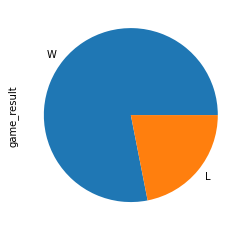

In [123]:

%matplotlib inline
#nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()
#nba["fran_id"].value_counts().head(10).plot(kind="bar")
# C  nba[(nba["year_id"] >= 2000) & (nba["year_id"] <= 2009)]
nba[(nba["year_id"] == 2013) & (nba["fran_id"] == "Heat")]["game_result"].value_counts().plot(kind="pie")
